In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

## GRADER PLEASE NOTE

* Some of the instructions are different from the original but still adhere to the rubric.
* The students get the average precipitation per day instead of every single precipitation value.

In [ ]:
#usa = session.query(BaseballPlayer).\
#    filter(BaseballPlayer.birth_country == 'USA').count()
#print(f"There are {usa} players from the USA")

In [19]:
session.query(Measurement).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fa1d93b8520>,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1}

In [21]:
# Find the most recent date in the data set.
session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()

('2017-08-23')

In [44]:
# Using this date, find the average precipitation per day
# for the preceding 12 months of data sorted by ascending date.
s = session.query(Measurement.date,func.avg(Measurement.prcp)).\
    order_by(Measurement.date.desc()).group_by(Measurement.date).limit(365).all()

In [47]:
s

[('2017-08-23', 0.1325),
 ('2017-08-22', 0.16666666666666666),
 ('2017-08-21', 0.19333333333333336),
 ('2017-08-20', 0.005),
 ('2017-08-19', 0.03),
 ('2017-08-18', 0.02),
 ('2017-08-17', 0.0475),
 ('2017-08-16', 0.1525),
 ('2017-08-15', 0.164),
 ('2017-08-14', 0.062),
 ('2017-08-13', 0.0),
 ('2017-08-12', 0.04666666666666667),
 ('2017-08-11', 0.0),
 ('2017-08-10', 0.0175),
 ('2017-08-09', 0.049999999999999996),
 ('2017-08-08', 0.11000000000000001),
 ('2017-08-07', 0.0125),
 ('2017-08-06', 0.0),
 ('2017-08-05', 0.03),
 ('2017-08-04', 0.015),
 ('2017-08-03', 0.017499999999999998),
 ('2017-08-02', 0.075),
 ('2017-08-01', 0.04666666666666666),
 ('2017-07-31', 0.0),
 ('2017-07-30', 0.06),
 ('2017-07-29', 0.10166666666666667),
 ('2017-07-28', 0.11),
 ('2017-07-27', 0.0016666666666666668),
 ('2017-07-26', 0.08333333333333333),
 ('2017-07-25', 0.08714285714285715),
 ('2017-07-24', 0.6539999999999999),
 ('2017-07-23', 0.22600000000000003),
 ('2017-07-22', 0.7366666666666667),
 ('2017-07-21', 0.

In [46]:
len(s)

365

In [52]:
# Convert your results into a pandas DataFrame with date as index.
df = pd.DataFrame(session.query(Measurement.prcp, func.avg(Measurement.prcp)).\
    order_by(Measurement.date.desc()).group_by(Measurement.date).limit(365))

ValueError: 1 columns passed, passed data had 2 columns

In [39]:
df.head(13)

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
5,2017-08-22,0.00
6,2017-08-22,0.50
7,2017-08-21,0.00
8,2017-08-21,0.02
9,2017-08-21,NaN


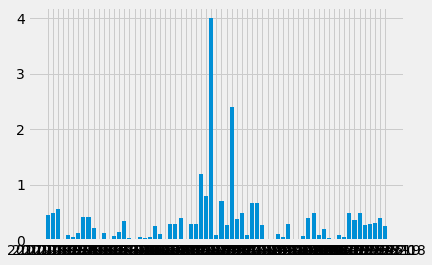

In [38]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(df['date'], df['prcp'])
plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data

# Exploratory Station Analysis

In [ ]:
# Query total number of stations in dataset


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest, 
# highest, and average temperature recorded for this station.


In [ ]:
# Query the last 12 months of temperature observation data for this station.
# Plot the results as a histogram with bins = 12.


# Close session